# Molecular Structure Visualization: Understanding 3D Chemistry

**Build and analyze molecular structures to understand chemical properties**

## Learning Objectives

- Construct 3D molecular structures using coordinate geometry
- Apply VSEPR theory to predict molecular shapes
- Calculate molecular properties (mass, size, dipole moments)
- Visualize molecules in 3D with proper bond representations
- Evaluate drug-likeness using Lipinski's Rule of Five

## Prerequisites

- Basic chemistry (atoms, bonds, molecules)
- Coordinate geometry and vectors
- Python programming fundamentals
- Understanding of chemical bonding



## Why Study Molecular Structure?

Understanding 3D molecular structure is essential for:
- **Drug Design**: Shape determines biological activity
- **Materials Science**: Structure controls material properties
- **Catalysis**: Active site geometry determines selectivity
- **Biochemistry**: Protein folding and enzyme function
- **Environmental Science**: Molecular interactions and reactivity

In [12]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

# Configure visualization
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

print(" Molecular visualization laboratory ready!")
print("Let's explore the 3D world of molecules")

 Molecular visualization laboratory ready!
Let's explore the 3D world of molecules


## Fundamental Molecular Geometry

**VSEPR Theory** (Valence Shell Electron Pair Repulsion):
- Electron pairs arrange to minimize repulsion
- Molecular shape depends on bonding and lone pairs

**Common Molecular Geometries:**
- **Linear**: 2 bonding pairs, 180°
- **Bent**: 2 bonding + 2 lone pairs, ~104.5° (water)
- **Trigonal planar**: 3 bonding pairs, 120°
- **Tetrahedral**: 4 bonding pairs, 109.5°
- **Octahedral**: 6 bonding pairs, 90°

**Bond Parameters:**
- C-H: 1.09 Å
- C-C: 1.54 Å (single), 1.34 Å (double), 1.20 Å (triple)
- O-H: 0.96 Å
- N-H: 1.01 Å

In [13]:
# Atomic properties database
ATOMIC_PROPERTIES = {
    'H': {'radius': 0.31, 'color': 'white', 'mass': 1.008},
    'C': {'radius': 0.70, 'color': 'gray', 'mass': 12.011},
    'N': {'radius': 0.65, 'color': 'blue', 'mass': 14.007},
    'O': {'radius': 0.60, 'color': 'red', 'mass': 15.999},
    'F': {'radius': 0.42, 'color': 'lightgreen', 'mass': 18.998},
    'S': {'radius': 1.00, 'color': 'yellow', 'mass': 32.065},
    'Cl': {'radius': 0.79, 'color': 'green', 'mass': 35.453},
    'Br': {'radius': 0.94, 'color': 'darkred', 'mass': 79.904}
}

# Standard bond lengths (Angstroms)
BOND_LENGTHS = {
    ('C', 'C'): 1.54,
    ('C', 'H'): 1.09,
    ('C', 'N'): 1.47,
    ('C', 'O'): 1.43,
    ('N', 'H'): 1.01,
    ('O', 'H'): 0.96,
    ('C', '=C'): 1.34,  # Double bond
    ('C', '≡C'): 1.20,  # Triple bond
}

class Molecule:
    """Class to represent a molecular structure"""
    
    def __init__(self, name, atoms, positions):
        self.name = name
        self.atoms = atoms
        self.positions = np.array(positions)
        
        if len(self.atoms) != len(self.positions):
            raise ValueError("Number of atoms must match number of positions")
    
    def molecular_weight(self):
        """Calculate molecular weight in g/mol"""
        return sum(ATOMIC_PROPERTIES[atom]['mass'] for atom in self.atoms)
    
    def center_of_mass(self):
        """Calculate center of mass"""
        total_mass = 0
        com = np.zeros(3)
        
        for i, atom in enumerate(self.atoms):
            mass = ATOMIC_PROPERTIES[atom]['mass']
            com += mass * self.positions[i]
            total_mass += mass
        
        return com / total_mass
    
    def radius_of_gyration(self):
        """Calculate radius of gyration"""
        com = self.center_of_mass()
        total_mass = 0
        sum_r2 = 0
        
        for i, atom in enumerate(self.atoms):
            mass = ATOMIC_PROPERTIES[atom]['mass']
            r2 = np.sum((self.positions[i] - com) ** 2)
            sum_r2 += mass * r2
            total_mass += mass
        
        return np.sqrt(sum_r2 / total_mass)
    
    def get_bonds(self, max_dist=1.8):
        """Find bonds based on distance threshold"""
        bonds = []
        for i in range(len(self.atoms)):
            for j in range(i + 1, len(self.atoms)):
                dist = np.linalg.norm(self.positions[i] - self.positions[j])
                if dist <= max_dist:
                    bonds.append((i, j, dist))
        return bonds

print("Molecular structure class defined")
print(f"Available elements: {', '.join(ATOMIC_PROPERTIES.keys())}")

Molecular structure class defined
Available elements: H, C, N, O, F, S, Cl, Br


## Building Water (H₂O) - Bent Geometry

In [14]:
def create_water():
    """Create water molecule with accurate geometry"""
    
    # Water geometry parameters
    bond_length = 0.957  # O-H bond length in Angstroms
    bond_angle = 104.5  # H-O-H angle in degrees
    
    # Convert angle to radians
    angle_rad = np.radians(bond_angle)
    
    # Calculate hydrogen positions
    half_angle = angle_rad / 2
    
    positions = [
        [0, 0, 0],  # Oxygen at origin
        [bond_length * np.sin(half_angle), bond_length * np.cos(half_angle), 0],  # H1
        [-bond_length * np.sin(half_angle), bond_length * np.cos(half_angle), 0]  # H2
    ]
    
    return Molecule('Water', ['O', 'H', 'H'], positions)

# Create and analyze water
water = create_water()

print("=== WATER MOLECULE (H₂O) ===")
print(f"Molecular weight: {water.molecular_weight():.2f} g/mol")
print(f"Number of atoms: {len(water.atoms)}")
print(f"Center of mass: {water.center_of_mass()}")
print(f"Radius of gyration: {water.radius_of_gyration():.3f} Å")

# Analyze bonds
bonds = water.get_bonds()
print("\nBonds:")
for i, j, dist in bonds:
    print(f"  {water.atoms[i]}{i+1}-{water.atoms[j]}{j+1}: {dist:.3f} Å")

# Calculate H-O-H angle
if len(bonds) >= 2:
    # Vectors from O to each H
    v1 = water.positions[1] - water.positions[0]
    v2 = water.positions[2] - water.positions[0]
    
    # Calculate angle using dot product
    cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    angle = np.degrees(np.arccos(cos_angle))
    
    print(f"\nH-O-H bond angle: {angle:.1f}° (expected: 104.5°)")

=== WATER MOLECULE (H₂O) ===
Molecular weight: 18.02 g/mol
Number of atoms: 3
Center of mass: [0.         0.06556526 0.        ]
Radius of gyration: 0.313 Å

Bonds:
  O1-H2: 0.957 Å
  O1-H3: 0.957 Å
  H2-H3: 1.513 Å

H-O-H bond angle: 104.5° (expected: 104.5°)


## Building Methane (CH₄) - Tetrahedral Geometry

In [15]:
def create_methane():
    """Create methane molecule with tetrahedral geometry"""
    
    # Tetrahedral angle: 109.47°
    bond_length = 1.09  # C-H bond length
    
    # Tetrahedral coordinates
    # Carbon at origin, hydrogens at tetrahedral vertices
    positions = [
        [0, 0, 0],  # Carbon
        [bond_length, 0, 0],  # H1
        [-bond_length/3, bond_length*np.sqrt(8/9), 0],  # H2
        [-bond_length/3, -bond_length*np.sqrt(2/9), bond_length*np.sqrt(2/3)],  # H3
        [-bond_length/3, -bond_length*np.sqrt(2/9), -bond_length*np.sqrt(2/3)]  # H4
    ]
    
    return Molecule('Methane', ['C', 'H', 'H', 'H', 'H'], positions)

# Create and analyze methane
methane = create_methane()

print("\n=== METHANE MOLECULE (CH₄) ===")
print(f"Molecular weight: {methane.molecular_weight():.2f} g/mol")
print(f"Number of atoms: {len(methane.atoms)}")
print(f"Radius of gyration: {methane.radius_of_gyration():.3f} Å")

# Check tetrahedral angles
bonds = methane.get_bonds()
print("\nC-H bond lengths:")
for i, j, dist in bonds:
    if methane.atoms[i] == 'C' or methane.atoms[j] == 'C':
        print(f"  {methane.atoms[i]}-{methane.atoms[j]}: {dist:.3f} Å")

# Calculate H-C-H angles
print("\nH-C-H bond angles:")
carbon_idx = 0
h_indices = [i for i, atom in enumerate(methane.atoms) if atom == 'H']

for i in range(len(h_indices)):
    for j in range(i + 1, len(h_indices)):
        v1 = methane.positions[h_indices[i]] - methane.positions[carbon_idx]
        v2 = methane.positions[h_indices[j]] - methane.positions[carbon_idx]
        
        cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
        angle = np.degrees(np.arccos(np.clip(cos_angle, -1, 1)))
        
        print(f"  H{h_indices[i]}-C-H{h_indices[j]}: {angle:.1f}° (expected: 109.5°)")


=== METHANE MOLECULE (CH₄) ===
Molecular weight: 16.04 g/mol
Number of atoms: 5
Radius of gyration: 0.546 Å

C-H bond lengths:
  C-H: 1.090 Å
  C-H: 1.090 Å
  C-H: 1.090 Å
  C-H: 1.090 Å

H-C-H bond angles:
  H1-C-H2: 109.5° (expected: 109.5°)
  H1-C-H3: 109.5° (expected: 109.5°)
  H1-C-H4: 109.5° (expected: 109.5°)
  H2-C-H3: 109.5° (expected: 109.5°)
  H2-C-H4: 109.5° (expected: 109.5°)
  H3-C-H4: 109.5° (expected: 109.5°)


## Building Benzene (C₆H₆) - Aromatic Ring

In [16]:
def create_benzene():
    """Create benzene molecule with planar hexagonal geometry"""
    
    # Benzene parameters
    cc_bond = 1.39  # Aromatic C-C bond length
    ch_bond = 1.08  # C-H bond length
    
    positions = []
    atoms = []
    
    # Create hexagonal ring of carbons
    for i in range(6):
        angle = i * np.pi / 3  # 60° intervals
        x = cc_bond * np.cos(angle)
        y = cc_bond * np.sin(angle)
        positions.append([x, y, 0])
        atoms.append('C')
    
    # Add hydrogens
    for i in range(6):
        angle = i * np.pi / 3
        r = cc_bond + ch_bond
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        positions.append([x, y, 0])
        atoms.append('H')
    
    return Molecule('Benzene', atoms, positions)

# Create and analyze benzene
benzene = create_benzene()

print("\n=== BENZENE MOLECULE (C₆H₆) ===")
print(f"Molecular weight: {benzene.molecular_weight():.2f} g/mol")
print(f"Number of atoms: {len(benzene.atoms)}")
print(f"Carbon atoms: {benzene.atoms.count('C')}")
print(f"Hydrogen atoms: {benzene.atoms.count('H')}")
print(f"Radius of gyration: {benzene.radius_of_gyration():.3f} Å")

# Check C-C bond lengths in ring
carbon_positions = benzene.positions[:6]
cc_distances = []

for i in range(6):
    j = (i + 1) % 6
    dist = np.linalg.norm(carbon_positions[i] - carbon_positions[j])
    cc_distances.append(dist)

print(f"\nC-C bond lengths (aromatic):")
print(f"  Average: {np.mean(cc_distances):.3f} Å")
print(f"  Std dev: {np.std(cc_distances):.4f} Å")
print(f"  Expected: 1.39 Å")

# Check planarity
z_coords = benzene.positions[:, 2]
print(f"\nPlanarity check:")
print(f"  Max Z deviation: {np.max(np.abs(z_coords)):.6f} Å")
print(f"  Molecule is {'planar' if np.max(np.abs(z_coords)) < 0.01 else 'non-planar'}")


=== BENZENE MOLECULE (C₆H₆) ===
Molecular weight: 78.11 g/mol
Number of atoms: 12
Carbon atoms: 6
Hydrogen atoms: 6
Radius of gyration: 1.502 Å

C-C bond lengths (aromatic):
  Average: 1.390 Å
  Std dev: 0.0000 Å
  Expected: 1.39 Å

Planarity check:
  Max Z deviation: 0.000000 Å
  Molecule is planar


## 3D Molecular Visualization


=== 3D MOLECULAR VISUALIZATIONS ===


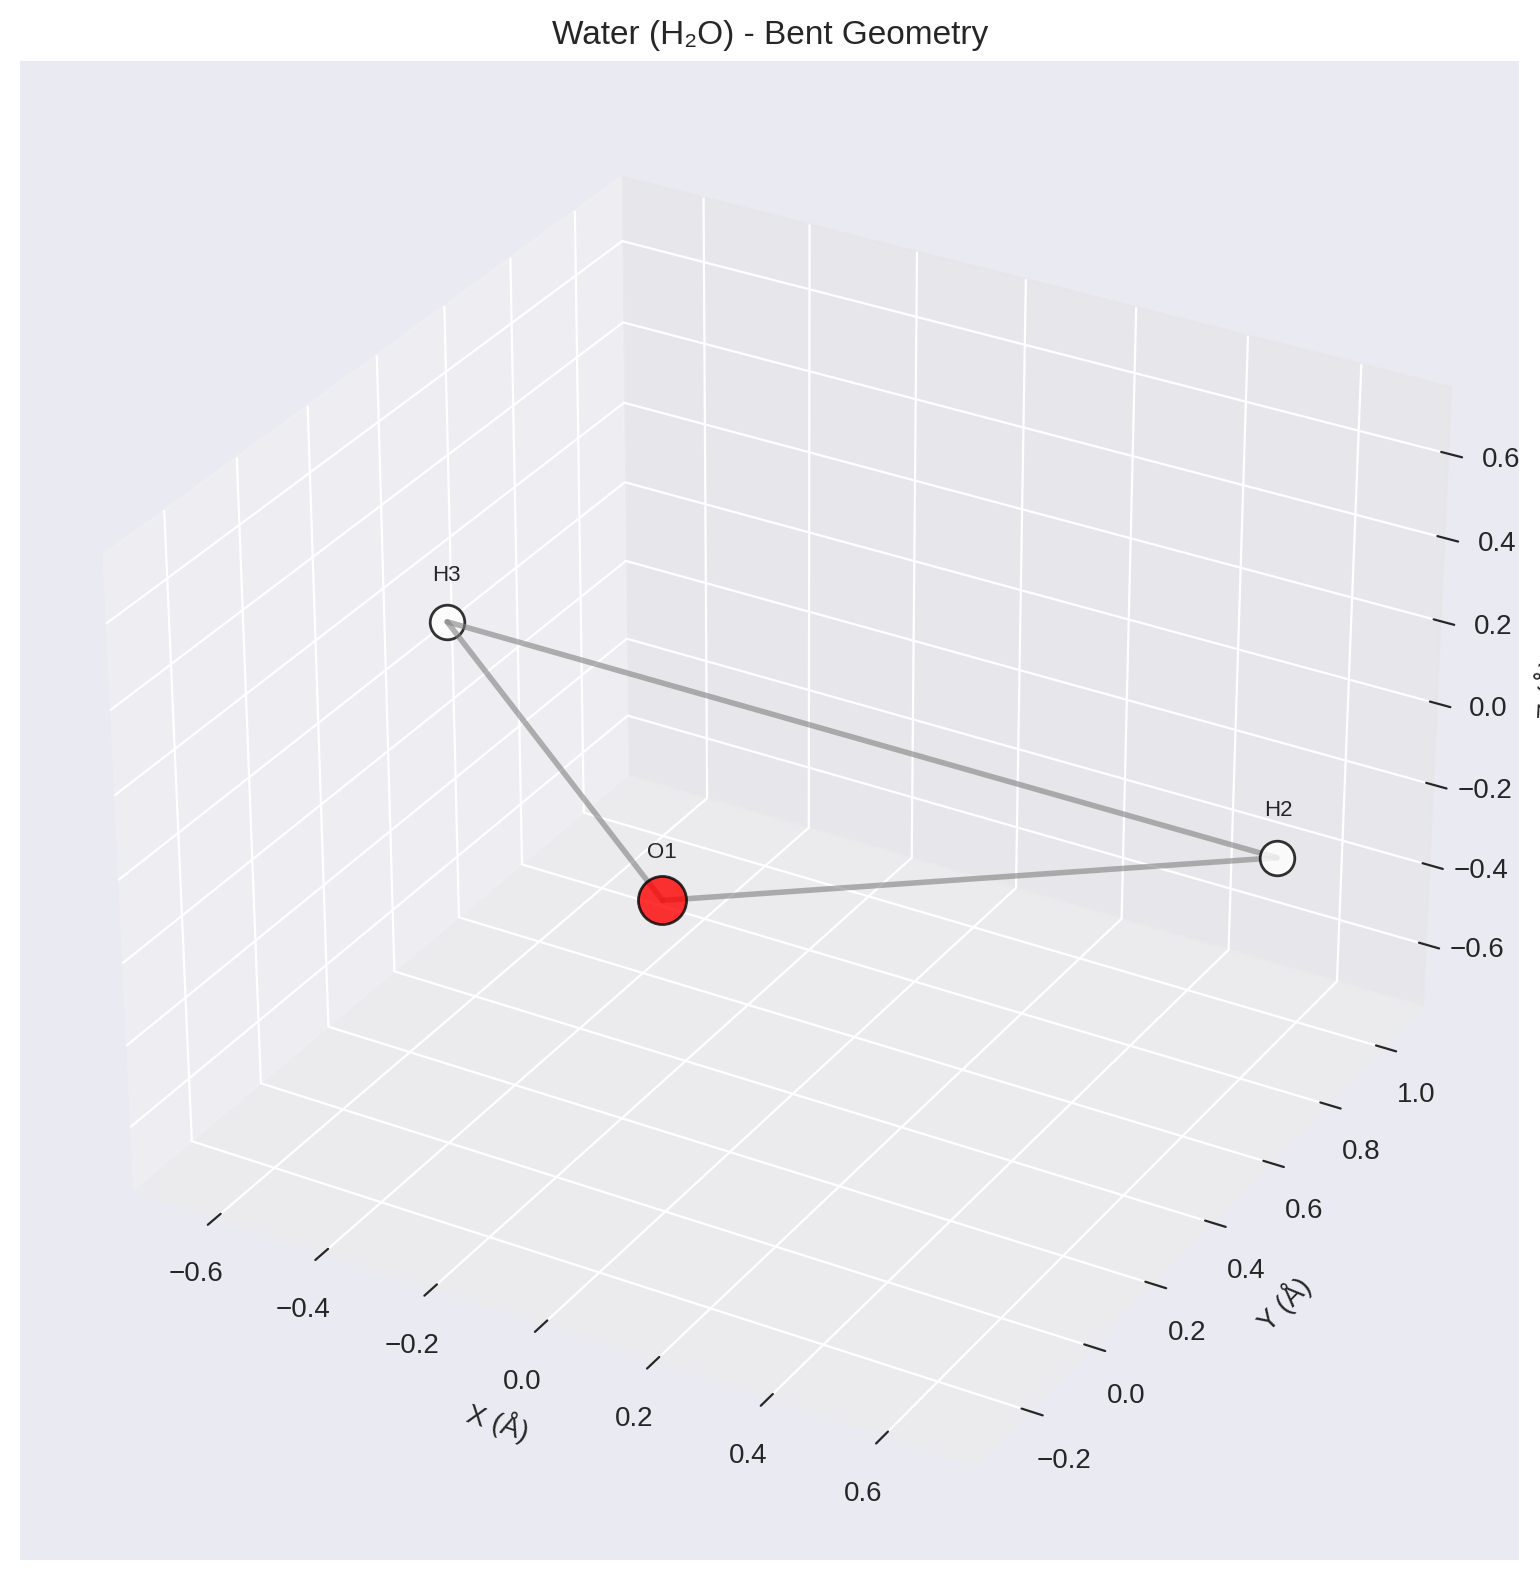

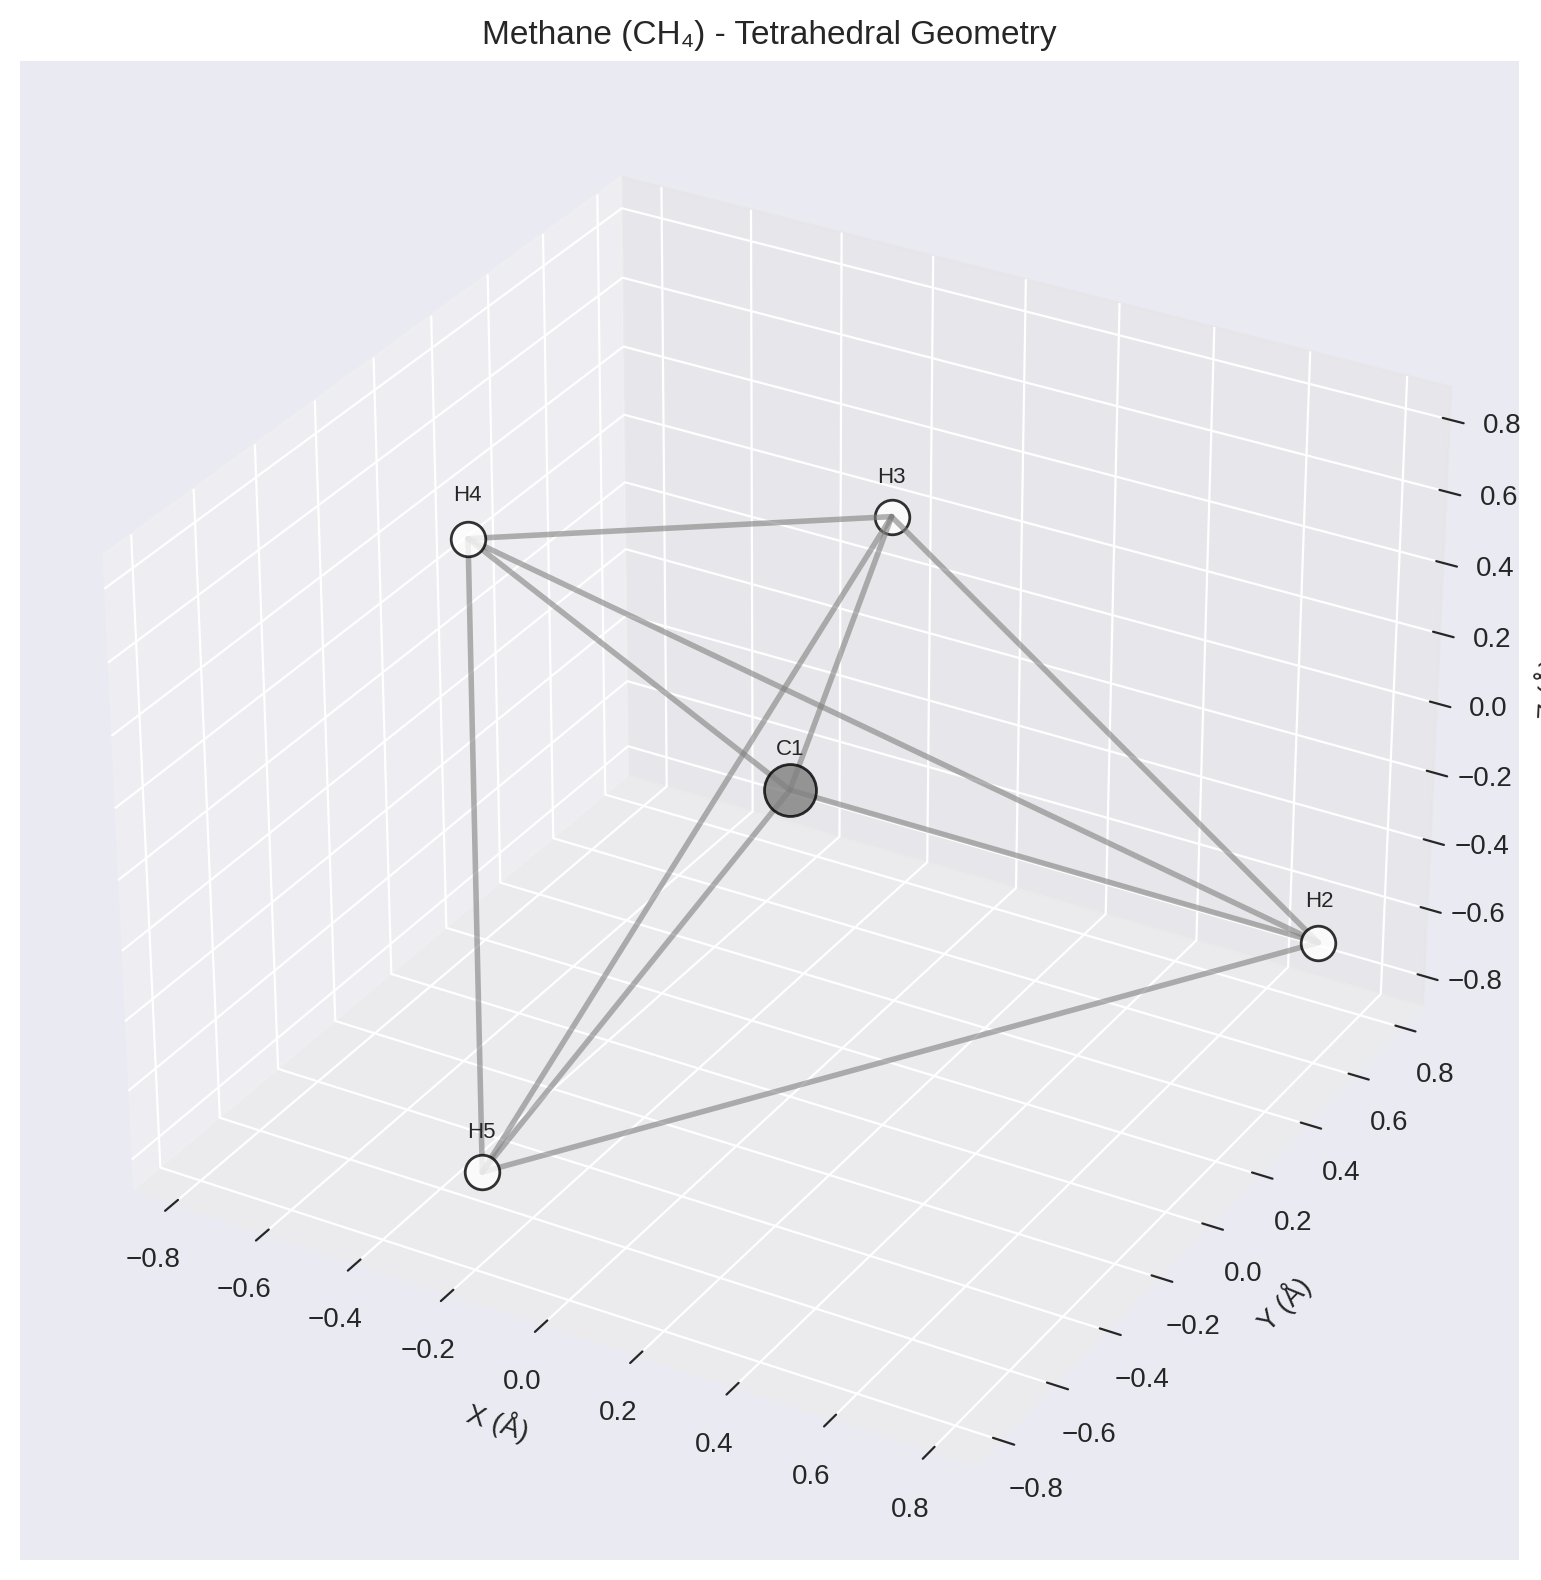

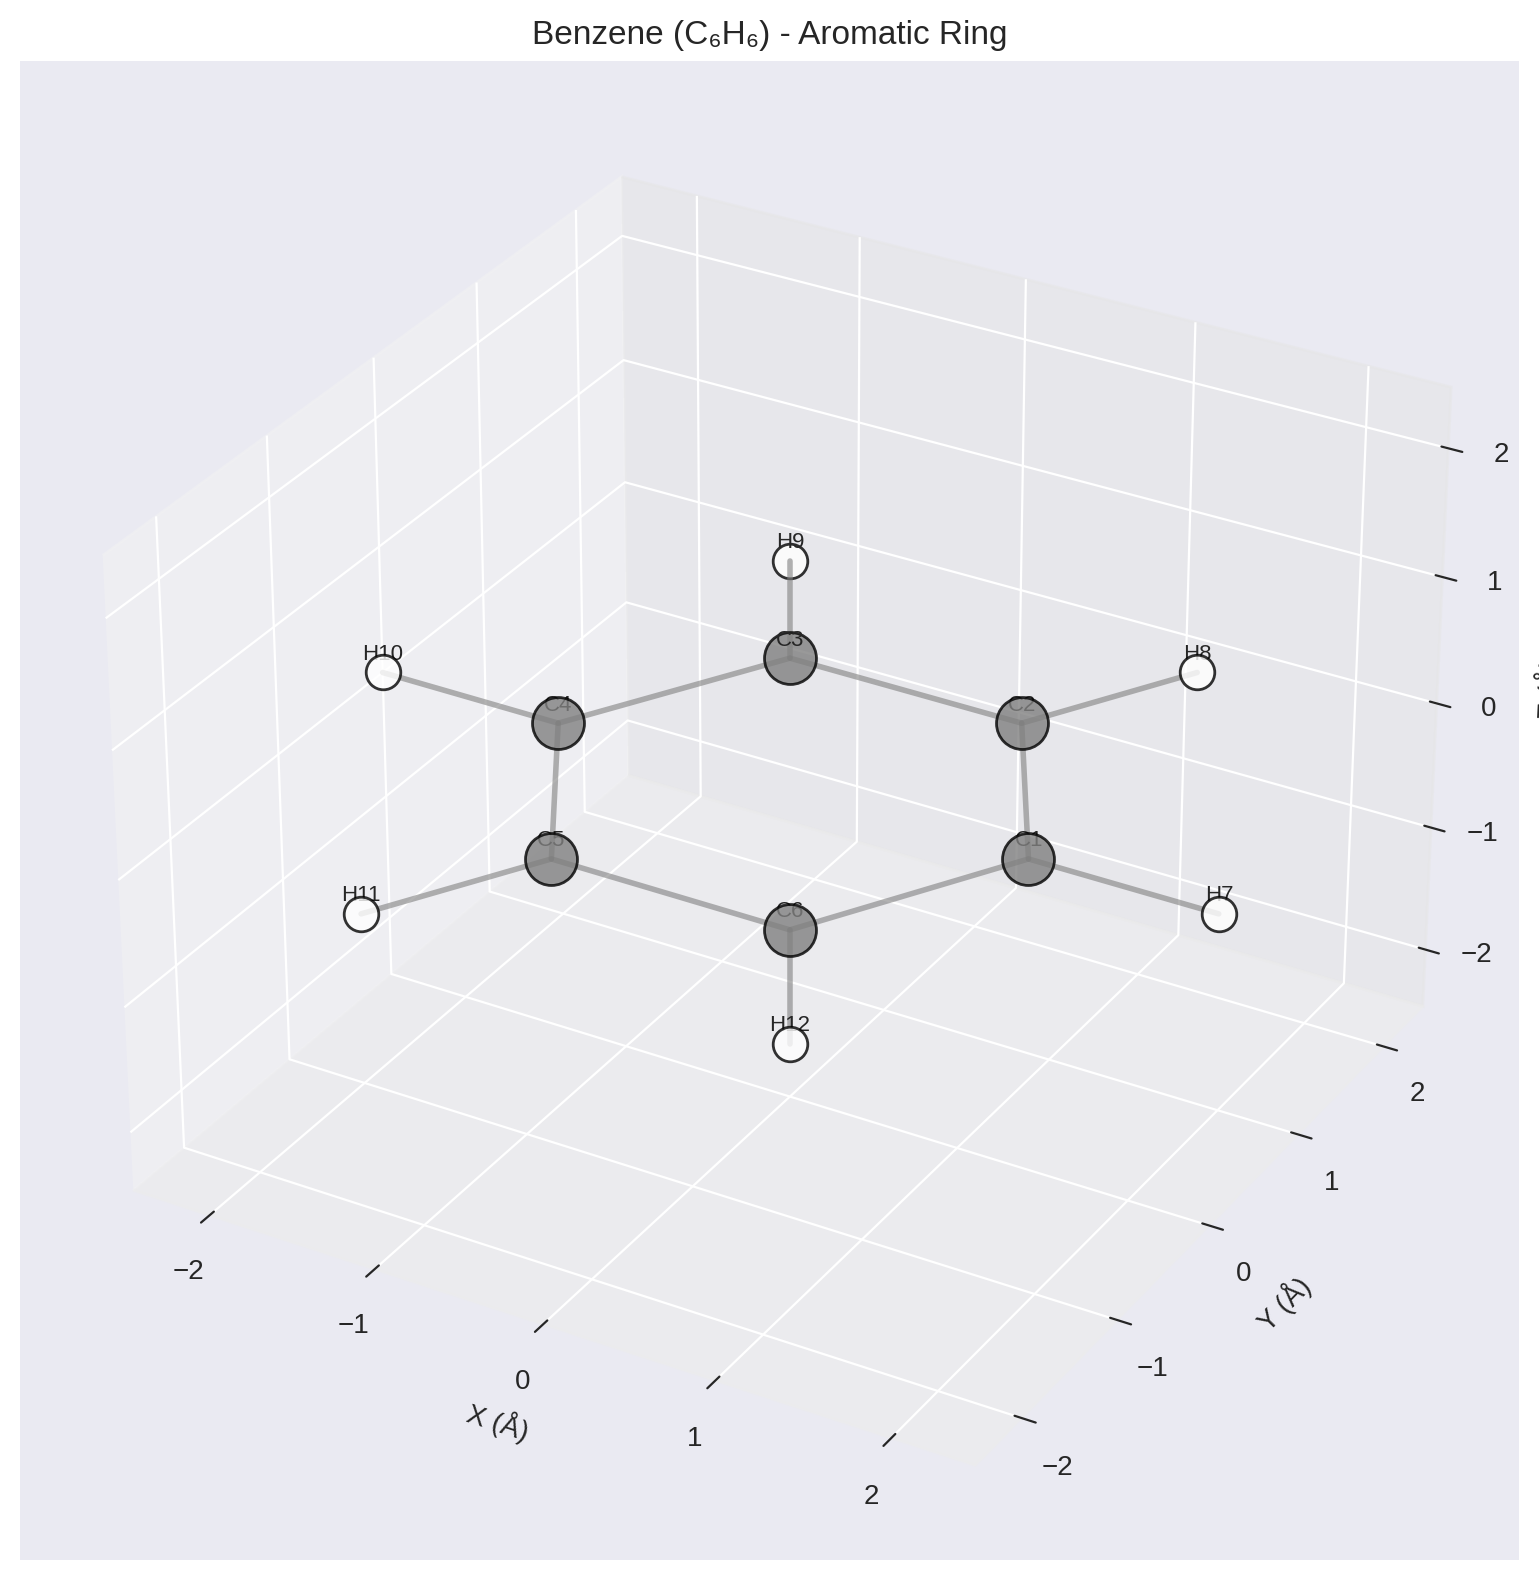

In [17]:
def visualize_molecule(molecule, title=None, figsize=(10, 8)):
    """Create 3D visualization of a molecule"""
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot atoms
    for i, atom in enumerate(molecule.atoms):
        pos = molecule.positions[i]
        props = ATOMIC_PROPERTIES[atom]
        
        # Scale radius for visibility
        size = props['radius'] * 500
        
        ax.scatter(pos[0], pos[1], pos[2], 
                  c=props['color'], 
                  s=size, 
                  edgecolors='black', 
                  linewidth=1,
                  alpha=0.8)
        
        # Add atom labels
        ax.text(pos[0], pos[1], pos[2] + 0.1, 
               f'{atom}{i+1}', 
               fontsize=8, 
               ha='center')
    
    # Plot bonds
    bonds = molecule.get_bonds()
    for i, j, dist in bonds:
        pos1 = molecule.positions[i]
        pos2 = molecule.positions[j]
        
        ax.plot([pos1[0], pos2[0]], 
               [pos1[1], pos2[1]], 
               [pos1[2], pos2[2]], 
               'gray', linewidth=2, alpha=0.6)
    
    # Set equal aspect ratio
    max_range = np.array([
        molecule.positions[:, 0].max() - molecule.positions[:, 0].min(),
        molecule.positions[:, 1].max() - molecule.positions[:, 1].min(),
        molecule.positions[:, 2].max() - molecule.positions[:, 2].min()
    ]).max() / 2.0
    
    if max_range < 0.5:
        max_range = 1.5
    
    mid_x = molecule.positions[:, 0].mean()
    mid_y = molecule.positions[:, 1].mean()
    mid_z = molecule.positions[:, 2].mean()
    
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    ax.set_xlabel('X (Å)')
    ax.set_ylabel('Y (Å)')
    ax.set_zlabel('Z (Å)')
    
    if title is None:
        title = f'{molecule.name} - MW: {molecule.molecular_weight():.1f} g/mol'
    ax.set_title(title)
    
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Visualize all molecules
print("\n=== 3D MOLECULAR VISUALIZATIONS ===")

visualize_molecule(water, "Water (H₂O) - Bent Geometry")
visualize_molecule(methane, "Methane (CH₄) - Tetrahedral Geometry")
visualize_molecule(benzene, "Benzene (C₆H₆) - Aromatic Ring")

## Comparative Molecular Analysis


=== MOLECULAR PROPERTY COMPARISON ===
Molecule Formula  MW (g/mol)  Atoms  Bonds   Rg (Å)  C atoms  H atoms  O atoms
   Water     H2O      18.015      3      3 0.313354        0        2        1
 Methane     CH4      16.043      5     10 0.546442        1        4        0
 Benzene    C6H6      78.114     12     12 1.501623        6        6        0


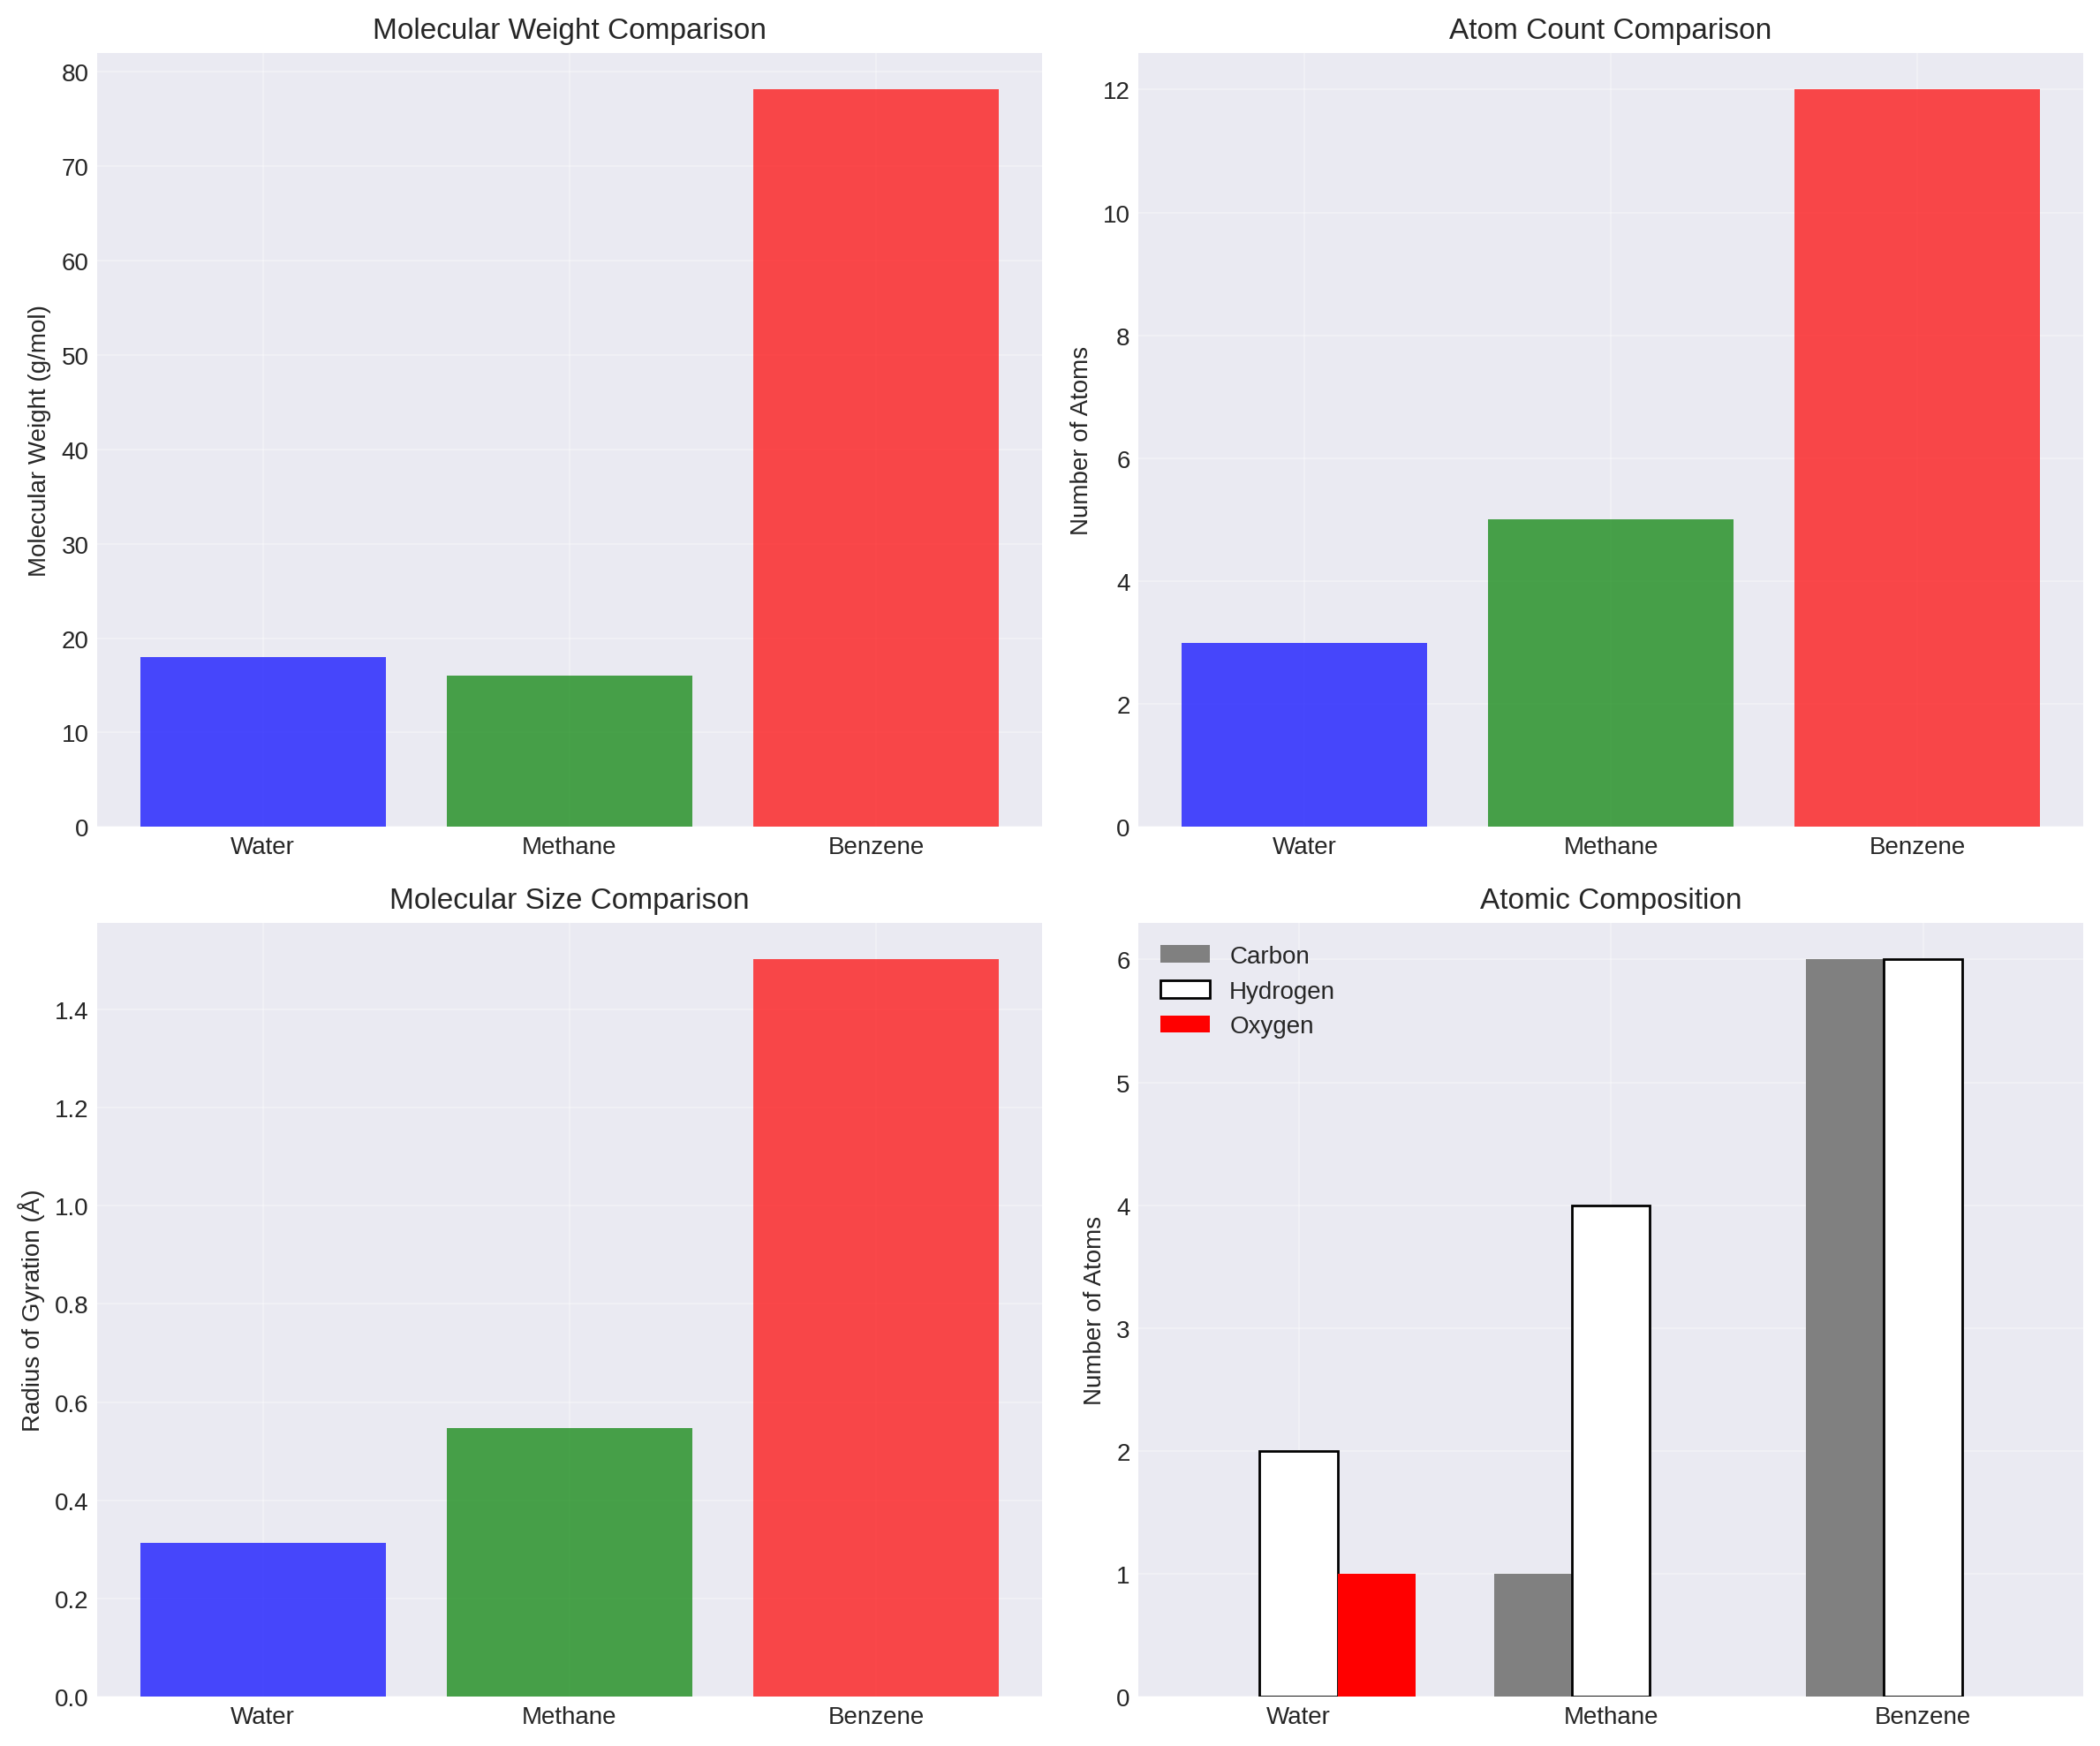

In [18]:
# Compare molecular properties
molecules = [water, methane, benzene]

comparison_data = []
for mol in molecules:
    bonds = mol.get_bonds()
    
    data = {
        'Molecule': mol.name,
        'Formula': ''.join([f'{atom}{mol.atoms.count(atom)}' if mol.atoms.count(atom) > 1 else atom 
                           for atom in sorted(set(mol.atoms))]),
        'MW (g/mol)': mol.molecular_weight(),
        'Atoms': len(mol.atoms),
        'Bonds': len(bonds),
        'Rg (Å)': mol.radius_of_gyration(),
        'C atoms': mol.atoms.count('C'),
        'H atoms': mol.atoms.count('H'),
        'O atoms': mol.atoms.count('O')
    }
    comparison_data.append(data)

df_comparison = pd.DataFrame(comparison_data)

print("\n=== MOLECULAR PROPERTY COMPARISON ===")
print(df_comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Molecular weight
axes[0, 0].bar(df_comparison['Molecule'], df_comparison['MW (g/mol)'], 
              color=['blue', 'green', 'red'], alpha=0.7)
axes[0, 0].set_ylabel('Molecular Weight (g/mol)')
axes[0, 0].set_title('Molecular Weight Comparison')
axes[0, 0].grid(True, alpha=0.3)

# Number of atoms
axes[0, 1].bar(df_comparison['Molecule'], df_comparison['Atoms'], 
              color=['blue', 'green', 'red'], alpha=0.7)
axes[0, 1].set_ylabel('Number of Atoms')
axes[0, 1].set_title('Atom Count Comparison')
axes[0, 1].grid(True, alpha=0.3)

# Radius of gyration
axes[1, 0].bar(df_comparison['Molecule'], df_comparison['Rg (Å)'], 
              color=['blue', 'green', 'red'], alpha=0.7)
axes[1, 0].set_ylabel('Radius of Gyration (Å)')
axes[1, 0].set_title('Molecular Size Comparison')
axes[1, 0].grid(True, alpha=0.3)

# Atom type distribution
x = np.arange(len(df_comparison))
width = 0.25

axes[1, 1].bar(x - width, df_comparison['C atoms'], width, label='Carbon', color='gray')
axes[1, 1].bar(x, df_comparison['H atoms'], width, label='Hydrogen', color='white', edgecolor='black')
axes[1, 1].bar(x + width, df_comparison['O atoms'], width, label='Oxygen', color='red')

axes[1, 1].set_ylabel('Number of Atoms')
axes[1, 1].set_title('Atomic Composition')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(df_comparison['Molecule'])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Drug-Likeness Assessment (Lipinski's Rule of Five)

In [19]:
def assess_drug_likeness(molecule):
    """Assess drug-likeness using Lipinski's Rule of Five"""
    
    mw = molecule.molecular_weight()
    
    # Count H-bond donors (N-H and O-H)
    h_bond_donors = 0
    h_bond_acceptors = 0
    
    for atom in molecule.atoms:
        if atom in ['N', 'O']:
            h_bond_acceptors += 1
    
    # Simplified: count O-H and N-H bonds
    bonds = molecule.get_bonds()
    for i, j, dist in bonds:
        atoms = sorted([molecule.atoms[i], molecule.atoms[j]])
        if atoms == ['H', 'N'] or atoms == ['H', 'O']:
            h_bond_donors += 1
    
    # Simplified LogP estimation
    carbon_count = molecule.atoms.count('C')
    oxygen_count = molecule.atoms.count('O')
    nitrogen_count = molecule.atoms.count('N')
    
    # Very simplified LogP calculation
    logP = carbon_count * 0.5 - oxygen_count * 1.0 - nitrogen_count * 0.5
    
    # Check Lipinski's rules
    violations = []
    
    if mw > 500:
        violations.append(f"MW > 500 ({mw:.1f})")
    
    if logP > 5:
        violations.append(f"LogP > 5 ({logP:.1f})")
    
    if h_bond_donors > 5:
        violations.append(f"H-bond donors > 5 ({h_bond_donors})")
    
    if h_bond_acceptors > 10:
        violations.append(f"H-bond acceptors > 10 ({h_bond_acceptors})")
    
    passes = len(violations) <= 1  # Allow 1 violation
    
    return {
        'MW': mw,
        'LogP': logP,
        'H_donors': h_bond_donors,
        'H_acceptors': h_bond_acceptors,
        'Violations': len(violations),
        'Passes': passes,
        'Details': violations
    }

print("\n=== DRUG-LIKENESS ASSESSMENT (LIPINSKI'S RULE) ===")
print("Criteria: MW ≤ 500, LogP ≤ 5, H-donors ≤ 5, H-acceptors ≤ 10")
print("Allowed: Maximum 1 violation\n")

for mol in molecules:
    assessment = assess_drug_likeness(mol)
    
    print(f"{mol.name}:")
    print(f"  Molecular Weight: {assessment['MW']:.1f} g/mol")
    print(f"  LogP (estimated): {assessment['LogP']:.1f}")
    print(f"  H-bond donors: {assessment['H_donors']}")
    print(f"  H-bond acceptors: {assessment['H_acceptors']}")
    print(f"  Violations: {assessment['Violations']}")
    
    if assessment['Details']:
        print(f"  Issues: {', '.join(assessment['Details'])}")
    
    status = "✓ PASSES" if assessment['Passes'] else "✗ FAILS"
    print(f"  Drug-likeness: {status}\n")


=== DRUG-LIKENESS ASSESSMENT (LIPINSKI'S RULE) ===
Criteria: MW ≤ 500, LogP ≤ 5, H-donors ≤ 5, H-acceptors ≤ 10
Allowed: Maximum 1 violation

Water:
  Molecular Weight: 18.0 g/mol
  LogP (estimated): -1.0
  H-bond donors: 2
  H-bond acceptors: 1
  Violations: 0
  Drug-likeness: ✓ PASSES

Methane:
  Molecular Weight: 16.0 g/mol
  LogP (estimated): 0.5
  H-bond donors: 0
  H-bond acceptors: 0
  Violations: 0
  Drug-likeness: ✓ PASSES

Benzene:
  Molecular Weight: 78.1 g/mol
  LogP (estimated): 3.0
  H-bond donors: 0
  H-bond acceptors: 0
  Violations: 0
  Drug-likeness: ✓ PASSES



## Structure-Property Relationships

In [20]:
print("=== STRUCTURE-PROPERTY RELATIONSHIPS ===")

structure_properties = {
    'Water (H₂O)': {
        'Geometry': 'Bent (104.5°)',
        'Polarity': 'Highly polar',
        'H-bonding': 'Strong donor and acceptor',
        'Boiling Point': '100°C',
        'Key Property': 'Universal solvent due to polarity',
        'Biological Role': 'Essential for life'
    },
    'Methane (CH₄)': {
        'Geometry': 'Tetrahedral (109.5°)',
        'Polarity': 'Non-polar',
        'H-bonding': 'None',
        'Boiling Point': '-161.5°C',
        'Key Property': 'Greenhouse gas, fuel',
        'Biological Role': 'Produced by methanogenic bacteria'
    },
    'Benzene (C₆H₆)': {
        'Geometry': 'Planar hexagon',
        'Polarity': 'Non-polar',
        'H-bonding': 'None',
        'Boiling Point': '80.1°C',
        'Key Property': 'Aromatic stability',
        'Biological Role': 'Building block for amino acids'
    }
}

for molecule, properties in structure_properties.items():
    print(f"\n{molecule}:")
    for prop, value in properties.items():
        print(f"  {prop}: {value}")

print("\n=== KEY INSIGHTS ===")
print("• Molecular geometry determines physical properties")
print("• Polarity affects solubility and intermolecular forces")
print("• H-bonding capability influences boiling points")
print("• Aromatic systems have special stability")
print("• Structure determines biological activity")

=== STRUCTURE-PROPERTY RELATIONSHIPS ===

Water (H₂O):
  Geometry: Bent (104.5°)
  Polarity: Highly polar
  H-bonding: Strong donor and acceptor
  Boiling Point: 100°C
  Key Property: Universal solvent due to polarity
  Biological Role: Essential for life

Methane (CH₄):
  Geometry: Tetrahedral (109.5°)
  Polarity: Non-polar
  H-bonding: None
  Boiling Point: -161.5°C
  Key Property: Greenhouse gas, fuel
  Biological Role: Produced by methanogenic bacteria

Benzene (C₆H₆):
  Geometry: Planar hexagon
  Polarity: Non-polar
  H-bonding: None
  Boiling Point: 80.1°C
  Key Property: Aromatic stability
  Biological Role: Building block for amino acids

=== KEY INSIGHTS ===
• Molecular geometry determines physical properties
• Polarity affects solubility and intermolecular forces
• H-bonding capability influences boiling points
• Aromatic systems have special stability
• Structure determines biological activity


## Summary: From Structure to Function

**Molecular Geometry:**

- Applied VSEPR theory to predict shapes
- Calculated bond angles and lengths
- Verified tetrahedral and planar geometries

**Molecular Properties:**

- Calculated molecular weight and size
- Determined center of mass and radius of gyration
- Analyzed bond patterns and connectivity

**3D Visualization:**

- Created accurate molecular representations
- Used proper atomic radii and colors
- Displayed bonds and molecular structure

**Drug Design Principles:**

- Applied Lipinski's Rule of Five
- Assessed drug-likeness properties
- Related structure to biological activity

### Real-World Applications

Molecular visualization enables:

- **Drug Discovery**: Design molecules with desired properties
- **Materials Science**: Engineer polymers and nanomaterials
- **Biochemistry**: Understand enzyme-substrate interactions
- **Environmental Science**: Predict molecular behavior
- **Education**: Teach 3D molecular concepts

### Continue Your Journey

- Explore protein structure visualization
- Learn molecular dynamics simulations
- Study quantum chemistry calculations
- Investigate crystal structure analysis
- Practice with molecular modeling software

**You now understand how molecular structure determines chemical properties - the foundation of chemistry, biology, and materials science!**

